In [21]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
import pandas as pd
import numpy as np

In [22]:
loan_data=pd.read_csv("H:\Fall 2017\Applied Machine Learning\Projects\Individual_Project\Individual Project files\FINAL_DATA_CONSIDER\CSV\combi_final.csv")

In [23]:
loan_data

,loan_status(Target),pca1,pca2,pca3,pca4,pca5,pca6,pca7,grade,sub_grade,emp_length(years),home_ownership,verification_status,purpose,initial_list_status
0,1,-1.358983e+05,21216.927970,26842.062190,26597.547010,8436.373329,-13337.800620,14446.267740,B,B5,10+,RENT,Verified,debt_consolidation,f
1,1,2.463531e+05,-2719.928764,17016.077060,25123.050480,-34688.868670,11871.672550,-21787.227120,A,A2,10+,MORTGAGE,Not Verified,debt_consolidation,w
2,1,-1.624307e+05,-5822.178005,22453.756740,19481.737300,-7685.979237,3339.468896,81.499933,B,B2,4,RENT,Not Verified,debt_consolidation,f
3,1,-1.695704e+05,-21627.831010,2453.867684,-5323.412068,3460.920931,-841.368094,4124.224299,B,B5,10+,RENT,Source Verified,debt_consolidation,w
4,1,1.254292e+05,22030.861030,-5375.074412,-16713.816720,-5044.931760,-19063.904550,12989.321100,B,B5,10+,MORTGAGE,Verified,credit_card,w
5,1,-1.517028e+05,-20870.195610,-12326.819680,-390.477888,6079.955034,1888.827705,967.699339,E,E4,4,RENT,Verified,debt_consolidation,f
6,1,1.025786e+06,145852.754300,5371.189552,-117390.059400,-9802.062552,7054.930850,-8248.038605,A,A3,5,MORTGAGE,Source Verified,debt_consolidation,w
7,1,3.090030e+05,-9260.754131,28427.402030,-44949.534900,-6013.216384,17226.917780,4677.614700,B,B3,10+,MORTGAGE,Source Verified,debt_consolidation,f
8,1,-1.108421e+05,39436.348890,12283.751170,-15100.103710,576.292933,17239.940610,5228.811418,B,B1,7,MORTGAGE,Not Verified,debt_consolidation,f
9,1,-1.563160e+05,-30970.479240,-19760.646980,-11398.858230,-1663.868985,19606.310860,-1610.585666,B,B4,10+,RENT,Verified,debt_consolidation,f


In [24]:
###Just Checking if PCA did good Job
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

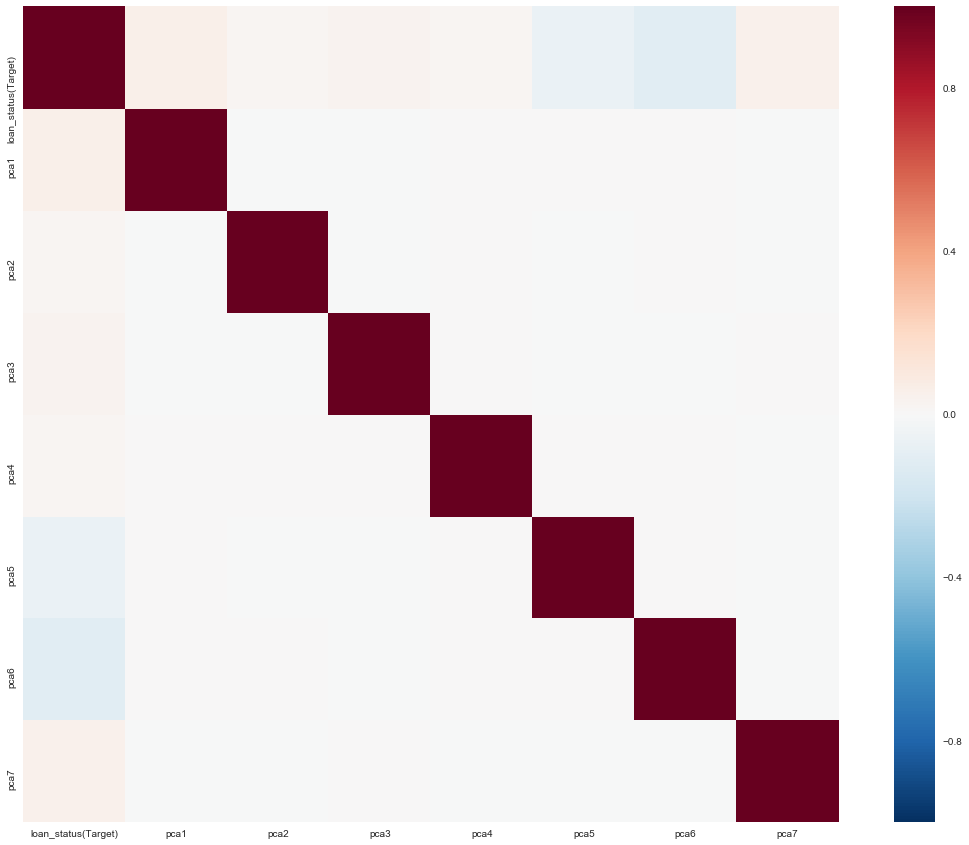

In [25]:
plt.figure(figsize=(20,15))
sns.heatmap(loan_data.corr(),vmax=1,square=True)

In [26]:
##Target Variable
Y=loan_data['loan_status(Target)']
Y

0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16        1
17        1
18        0
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
27        1
28        1
29        1
         ..
188151    1
188152    1
188153    1
188154    1
188155    1
188156    1
188157    1
188158    1
188159    1
188160    1
188161    1
188162    1
188163    1
188164    1
188165    1
188166    1
188167    1
188168    1
188169    1
188170    0
188171    0
188172    1
188173    1
188174    1
188175    1
188176    1
188177    1
188178    1
188179    0
188180    1
Name: loan_status(Target), Length: 188181, dtype: int64

In [27]:
##All variables except the target will be our features SO..
X1=loan_data.drop('loan_status(Target)',1)
X1

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,grade,sub_grade,emp_length(years),home_ownership,verification_status,purpose,initial_list_status
0,-1.358983e+05,21216.927970,26842.062190,26597.547010,8436.373329,-13337.800620,14446.267740,B,B5,10+,RENT,Verified,debt_consolidation,f
1,2.463531e+05,-2719.928764,17016.077060,25123.050480,-34688.868670,11871.672550,-21787.227120,A,A2,10+,MORTGAGE,Not Verified,debt_consolidation,w
2,-1.624307e+05,-5822.178005,22453.756740,19481.737300,-7685.979237,3339.468896,81.499933,B,B2,4,RENT,Not Verified,debt_consolidation,f
3,-1.695704e+05,-21627.831010,2453.867684,-5323.412068,3460.920931,-841.368094,4124.224299,B,B5,10+,RENT,Source Verified,debt_consolidation,w
4,1.254292e+05,22030.861030,-5375.074412,-16713.816720,-5044.931760,-19063.904550,12989.321100,B,B5,10+,MORTGAGE,Verified,credit_card,w
5,-1.517028e+05,-20870.195610,-12326.819680,-390.477888,6079.955034,1888.827705,967.699339,E,E4,4,RENT,Verified,debt_consolidation,f
6,1.025786e+06,145852.754300,5371.189552,-117390.059400,-9802.062552,7054.930850,-8248.038605,A,A3,5,MORTGAGE,Source Verified,debt_consolidation,w
7,3.090030e+05,-9260.754131,28427.402030,-44949.534900,-6013.216384,17226.917780,4677.614700,B,B3,10+,MORTGAGE,Source Verified,debt_consolidation,f
8,-1.108421e+05,39436.348890,12283.751170,-15100.103710,576.292933,17239.940610,5228.811418,B,B1,7,MORTGAGE,Not Verified,debt_consolidation,f
9,-1.563160e+05,-30970.479240,-19760.646980,-11398.858230,-1663.868985,19606.310860,-1610.585666,B,B4,10+,RENT,Verified,debt_consolidation,f


In [14]:
## Since our data has many categorical variables.. Applying Label_encoding using Scikit Learn's "Label Encoder"
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [15]:
X2=X1.apply(LabelEncoder().fit_transform)

In [16]:
##### Unleashing the Boruta Dragon
rf = RandomForestClassifier(n_jobs=-1, class_weight='auto', max_depth=5)

In [17]:
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

In [18]:
feat_selector.fit(X2.as_matrix(), Y.as_matrix())

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	13
Tentative: 	0
Rejected: 	1


BorutaPy finished running.

Iteration: 	10 / 100
Confirmed: 	13
Tentative: 	0
Rejected: 	1


BorutaPy(alpha=0.05,
     estimator=RandomForestClassifier(bootstrap=True, class_weight='auto', criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=105, n_jobs=-1, oob_score=False,
            random_state=<mtrand.RandomState object at 0x0000023AE6014168>,
            verbose=0, warm_start=False),
     max_iter=100, n_estimators='auto', perc=100,
     random_state=<mtrand.RandomState object at 0x0000023AE6014168>,
     two_step=True, verbose=2)

In [19]:
### Looking at which of the variables were rejected.....It seems the last variable has been rejected.
feat_selector.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False], dtype=bool)

In [20]:
####Doesn't realy matter here, Since
####13 out 14 are selected. Ranking will be useful when there are multi-variable confirms-rejects
feat_selector.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2])

In [ ]:
#### So after PCA, we had 7 Numerical variables, we had 7 more categorical variables in the dataset after initial cleaning.
###Boruta algorthm confirmed 13 out 14 variables and rejected 1 variable**(initial_list_status)**